In [ ]:
!pip install pyjanitor # Instalemos el módulo pyjanitor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd # Para importar Bases de Datos
from matplotlib import pyplot as plt # Para realizar gráficos básicos
from statsmodels.tsa.arima.model import ARIMA
from janitor import clean_names
import datetime

__Paso 1:__ Comencemos importando una base de datos:

statsmodels.org

In [ ]:
datos = pd.read_csv("/Datos/incidentes_viales_motos.csv", sep=";")

In [ ]:
datos = clean_names(datos)

In [ ]:
datos.head()

,nro_radicado,ano_incidente,fecha_incidente,hora_incidente,clase_incidente,gravedad_incidente,direccion,zona,diseno_via
0,1473523,2015,27/01/15,22:00:00,Choque,HERIDO,Calle 30 Con Carrera 49,Jurisdicci\xF3n,Tunel\r
1,1473525,2015,27/01/15,15:40:00,Choque,HERIDO,Calle 49 B Con Carrera 77 B,COMUNA 11,Tramo de via
2,1473526,2015,27/01/15,18:00:00,Choque,HERIDO,Calle 98 Con Carrera 51 A,COMUNA 4,Tramo de via
3,1473527,2015,27/01/15,7:30:00,Otro,HERIDO,Carrera 49 Con Calle 10,COMUNA 14,Tramo de via
4,1473528,2015,27/01/15,15:00:00,Choque,HERIDO,Carrera 30 Con Calle 11,COMUNA 14,Tramo de via


In [ ]:
datos.dtypes

nro_radicado           int64
ano_incidente          int64
fecha_incidente       object
hora_incidente        object
clase_incidente       object
gravedad_incidente    object
direccion             object
zona                  object
diseno_via            object
dtype: object

In [ ]:
datos.tail()

,nro_radicado,ano_incidente,fecha_incidente,hora_incidente,clase_incidente,gravedad_incidente,direccion,zona,diseno_via
223434,1759231,2021,25/08/2021,19:30:00,Caida Ocupante,HERIDO,Carrera 43 Con Calle 16 A,COMUNA 14,Lote o Predio
223435,1759324,2021,25/08/2021,19:50:00,Otro,HERIDO,Carrera 62 Con Calle 45,COMUNA 10,Lote o Predio
223436,1759665,2021,25/08/2021,20:15:00,Choque,HERIDO,Transversal 78 Con Calle 79 B,COMUNA 5,Tramo de via
223437,1759743,2021,25/08/2021,20:25:00,Choque,SOLO DA\xD1OS,Carrera 45 Con Calle 72 A,COMUNA 4,Interseccion\r
223438,1759627,2021,25/08/2021,21:00:00,Otro,HERIDO,Calle 48 DD Con Carrera 101,COMUNA 13,Lote o Predio


In [ ]:
datos.fecha_incidente[2]

'27/01/15'

In [ ]:
len(datos.fecha_incidente[2])

8

In [ ]:
datos.fecha_incidente[223437]

'25/08/2021'

In [ ]:
len(datos.fecha_incidente[223437])

10

In [ ]:
aux1=[]
for i in datos.fecha_incidente:
    if (len(i)==10):
        aux1.append(datetime.datetime.strptime(i,'%d/%m/%Y').date())
    else:
        aux1.append(datetime.datetime.strptime(i,'%d/%m/%y').date())

In [ ]:
datos["fecha"] = aux1

In [ ]:
datos["mes"] = pd.DatetimeIndex(datos.fecha).month
datos["anio"] = pd.DatetimeIndex(datos.fecha).year

In [ ]:
datos.head()

,nro_radicado,ano_incidente,fecha_incidente,hora_incidente,clase_incidente,gravedad_incidente,direccion,zona,diseno_via,fecha,mes,anio
0,1473523,2015,27/01/15,22:00:00,Choque,HERIDO,Calle 30 Con Carrera 49,Jurisdicci\xF3n,Tunel\r,2015-01-27,1,2015
1,1473525,2015,27/01/15,15:40:00,Choque,HERIDO,Calle 49 B Con Carrera 77 B,COMUNA 11,Tramo de via,2015-01-27,1,2015
2,1473526,2015,27/01/15,18:00:00,Choque,HERIDO,Calle 98 Con Carrera 51 A,COMUNA 4,Tramo de via,2015-01-27,1,2015
3,1473527,2015,27/01/15,7:30:00,Otro,HERIDO,Carrera 49 Con Calle 10,COMUNA 14,Tramo de via,2015-01-27,1,2015
4,1473528,2015,27/01/15,15:00:00,Choque,HERIDO,Carrera 30 Con Calle 11,COMUNA 14,Tramo de via,2015-01-27,1,2015


In [ ]:
datos.tail()

,nro_radicado,ano_incidente,fecha_incidente,hora_incidente,clase_incidente,gravedad_incidente,direccion,zona,diseno_via,fecha,mes,anio
223434,1759231,2021,25/08/2021,19:30:00,Caida Ocupante,HERIDO,Carrera 43 Con Calle 16 A,COMUNA 14,Lote o Predio,2021-08-25,8,2021
223435,1759324,2021,25/08/2021,19:50:00,Otro,HERIDO,Carrera 62 Con Calle 45,COMUNA 10,Lote o Predio,2021-08-25,8,2021
223436,1759665,2021,25/08/2021,20:15:00,Choque,HERIDO,Transversal 78 Con Calle 79 B,COMUNA 5,Tramo de via,2021-08-25,8,2021
223437,1759743,2021,25/08/2021,20:25:00,Choque,SOLO DA\xD1OS,Carrera 45 Con Calle 72 A,COMUNA 4,Interseccion\r,2021-08-25,8,2021
223438,1759627,2021,25/08/2021,21:00:00,Otro,HERIDO,Calle 48 DD Con Carrera 101,COMUNA 13,Lote o Predio,2021-08-25,8,2021


In [ ]:
datos.dtypes

nro_radicado           int64
ano_incidente          int64
fecha_incidente       object
hora_incidente        object
clase_incidente       object
gravedad_incidente    object
direccion             object
zona                  object
diseno_via            object
fecha                 object
mes                    int64
anio                   int64
dtype: object

In [ ]:
resum1 = datos.groupby(["anio", "mes"]).size().to_frame("accidentes")

In [ ]:
resum1.reset_index(inplace=True)

In [ ]:
resum1

,anio,mes,accidentes
0,2015,1,2596
1,2015,2,2680
2,2015,3,3077
3,2015,4,2876
4,2015,5,3114
...,...,...,...
75,2021,4,2038
76,2021,5,2860
77,2021,6,2844
78,2021,7,3180


In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
acf(resum1.accidentes, nlags=20)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


array([ 1.        ,  0.73751322,  0.55670006,  0.37076649,  0.21306717,
        0.11780313, -0.07516683, -0.08585314, -0.13458975, -0.06264921,
        0.00559341,  0.02503531,  0.15642162,  0.09756434,  0.07390462,
        0.01297071, -0.00705967,  0.05612077, -0.02286527,  0.00128398,
       -0.04070153])

In [ ]:
pacf(resum1.accidentes, nlags=20)

array([ 1.00000000e+00,  7.46848827e-01,  2.98298175e-02, -1.14927436e-01,
       -8.00435170e-02,  2.19692037e-02, -3.19435616e-01,  2.24470929e-01,
       -9.62960179e-02,  2.37819823e-01, -1.69862664e-04,  1.68107878e-02,
        1.89602137e-01, -3.10304739e-01, -8.20034221e-02,  4.64500945e-03,
        1.09830743e-01,  2.23503608e-01, -1.64939603e-01,  8.40130560e-02,
       -1.17068446e-01])

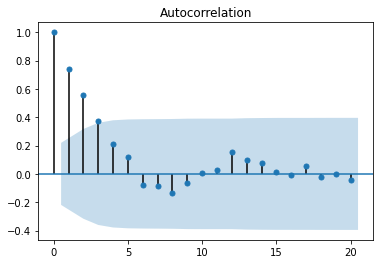

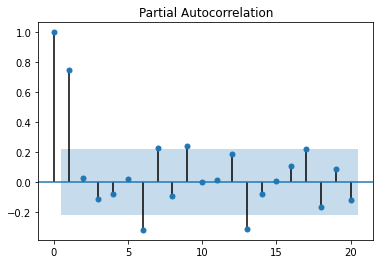

In [ ]:
plot_acf(resum1.accidentes)
plt.show()
plot_pacf(resum1.accidentes)
plt.show()

In [ ]:
ajuste1 = ARIMA(resum1.accidentes, order=(6,0,0))
results1 = ajuste1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             accidentes   No. Observations:                   80
Model:                 ARIMA(6, 0, 0)   Log Likelihood                -567.542
Date:                Fri, 09 Sep 2022   AIC                           1151.085
Time:                        20:01:24   BIC                           1170.141
Sample:                             0   HQIC                          1158.725
                                 - 80                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2792.9875    115.428     24.197      0.000    2566.752    3019.223
ar.L1          0.7021      0.092      7.643      0.000       0.522       0.882
ar.L2          0.1012      0.174      0.582      0.561      -0.240       0.442
ar.L3         -0.0704      0.164     -0.430      0.667      -0.392       0.251
ar.L4         -0.0513      0.190     -0.270      0.787      -0.424       0.322
ar.L5          0.2252      0.153      1.470      0.141      -0.075       0.525
ar.L6         -0.2961      0.158     -1.879      0.060      -0.605       0.013
sigma2      8.627e+04   1.34e+04      6.452      0.000    6.01e+04    1.12e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):                80.83
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               3.89   Skew:                            -1.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
ARIMA(resum1.accidentes, order= (6,0,0)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             accidentes   No. Observations:                   80
Model:                 ARIMA(6, 0, 0)   Log Likelihood                -567.542
Date:                Fri, 09 Sep 2022   AIC                           1151.085
Time:                        20:03:20   BIC                           1170.141
Sample:                             0   HQIC                          1158.725
                                 - 80                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2792.9875    115.428     24.197      0.000    2566.752    3019.223
ar.L1          0.7021      0.092      7.643      0.000       0.522       0.882
ar.L2          0.1012      0.174      0.582      0.561      -0.240       0.442
ar.L3         -0.0704      0.164     -0.430      0.667      -0.392       0.251
ar.L4         -0.0513      0.190     -0.270      0.787      -0.424       0.322
ar.L5          0.2252      0.153      1.470      0.141      -0.075       0.525
ar.L6         -0.2961      0.158     -1.879      0.060      -0.605       0.013
sigma2      8.627e+04   1.34e+04      6.452      0.000    6.01e+04    1.12e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):                80.83
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               3.89   Skew:                            -1.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""